<a href="https://colab.research.google.com/github/MainN/diploma/blob/master/Pystan_measles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install pystan
!pip install stan_utility

In [77]:
import os
import pystan
import seaborn as sns
import pandas as pd
from math import exp, cos, pi, log
import stan_utility

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
My_data=pd.read_csv("/content/gdrive/My Drive/data.csv")
My_data=My_data.fillna(0)
My_data


,t5,t6,t9,t12,t15,t20
0,386.0,249.0,108.0,66.0,67.0,59.0
1,281.0,229.0,39.0,38.0,0.0,18.0
2,0.0,115.0,0.0,0.0,0.0,28.0
3,122.0,0.0,105.0,21.0,34.0,32.0
4,868.0,482.0,370.0,0.0,98.0,72.0
...,...,...,...,...,...,...
159,463.0,254.0,0.0,97.0,0.0,47.0
160,478.0,93.0,0.0,38.0,23.0,20.0
161,0.0,402.0,0.0,0.0,26.0,20.0
162,159.0,100.0,48.0,31.0,14.0,12.0


In [80]:
code ='''
data {
    int  T ;  // Time
    int  N ;  // number of individuals
    real time[T]; // time measurements
    real dset[N,T]; // data
    
 }
parameters {
    real b0;
    real b1;
    vector[N] C;
    real<lower = 0> delta_C;
    real<lower = 0> delta_ERR;
}
model {
    delta_ERR ~ exponential(1);
    delta_C ~ exponential(1);
    b0 ~ normal(0,1);
    b1 ~ normal(0,1);
    C ~ normal(0,delta_C);
    for (t in 1:T) {
        for (i in 1:N) {
            if (dset[i,t] != 0)  {dset[i,t] ~ normal(C[i] + b0 + b1 * time[t],delta_ERR);}
        }
    }
}
'''
sm = pystan.StanModel(model_code=code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fe15037ebbe0e7dfad1b1a69aea68d55 NOW.


In [81]:
T=1#6
time =[log(x) for x in [1]]#[log(x) for x in [1,2,5,8,11,16]]
N = 1 #len(My_data)
data  = dict(
        T=T,
        N=N,
        dset=[[My_data.values[1][1]]],
        time=time)
init = dict(
    b0 = 6,
    b1 = -2,
    C = [0]*N,
    delta_C=1,
    delta_ERR=1)  


In [82]:
fit = sm.sampling(data=data, iter=10000, chains=4, init=[init]*4,thin=1,control={'max_treedepth': 20})
op = fit.extract()  

In [83]:
print(fit)

Inference for Stan model: anon_model_fe15037ebbe0e7dfad1b1a69aea68d55.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b0          0.16    0.02   0.98  -1.81  -0.48   0.17   0.83   2.04   1700    1.0
b1        9.3e-3    0.04   1.01  -1.97  -0.67   0.01   0.71   1.97    635   1.01
C[1]        0.39    0.03    1.7  -2.11  -0.25   0.06   0.63   4.94   3453    1.0
delta_C     1.08    0.04   1.09    0.1   0.31   0.72   1.47    4.1    855    1.0
delta_ERR  37.72    0.16   3.63  31.49  35.12   37.4  39.94   45.6    508   1.01
lp__      -59.18    0.05   1.72 -63.38 -60.11 -58.87 -57.89 -56.84   1021    1.0

Samples were drawn using NUTS at Mon Apr 19 12:42:01 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [84]:
print(op.keys())
print(len(op['b0']))

odict_keys(['b0', 'b1', 'C', 'delta_C', 'delta_ERR', 'lp__'])
20000


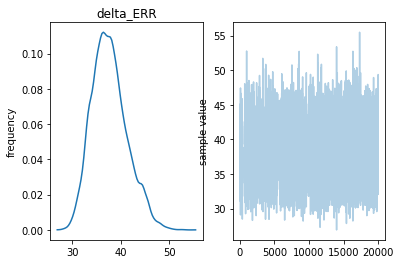

In [85]:
fit.plot('delta_ERR');

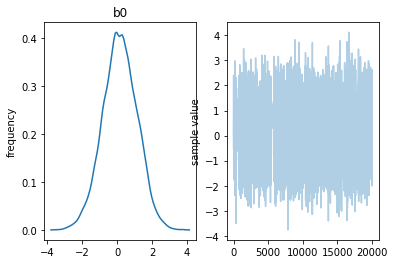

In [86]:
fit.plot('b0');

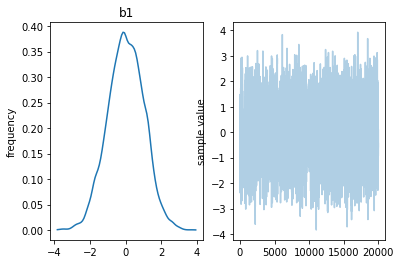

In [87]:
fit.plot('b1');

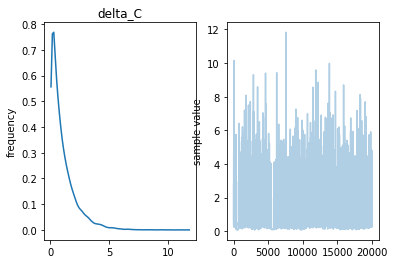

In [88]:
fit.plot('delta_C');

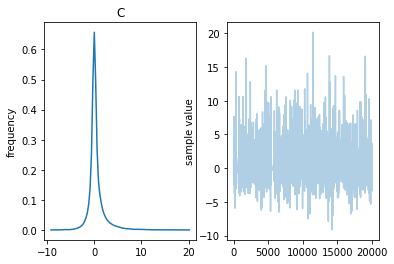

In [89]:
fit.plot('C');